Reference

https://stackoverflow.com/questions/69216791/creating-an-edge-list-from-a-pandas-dataframe

In [1]:
from sqlalchemy import create_engine

# Credentials to database connection
hostname="oss-1.cij9gk1eehyr.us-east-1.rds.amazonaws.com"
dbname="codegov"
uname=
pwd=

# Create SQLAlchemy engine to connect to MySQL Database
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
				.format(host=hostname, db=dbname, user=uname, pw=pwd))


In [9]:
 # Query to fetch all records

import pandas as pd
from sqlalchemy.sql import text
sql = '''
    SELECT * FROM codegov_slugs;
'''
with engine.connect().execution_options(autocommit=True) as conn:
    query = conn.execute(text(sql))         
df_agency = pd.DataFrame(query.fetchall())

In [10]:
df_agency.head()

,agency,repo_URL,slug
0,Department of Energy,https://github.com/ORNL-BTRIC/AutoBEM-DynamicA...,ORNL-BTRIC/AutoBEM-DynamicArchetypes\r
1,Department of Energy,https://github.com/Codeman655/initAnalysis,Codeman655/initAnalysis\r
2,Department of Energy,https://github.com/bnl/pub-ML_examples,bnl/pub-ML_examples\r
3,Department of Energy,https://github.com/idaholab/Deep-Lynx-UNC,idaholab/Deep-Lynx-UNC\r
4,Department of Energy,https://github.com/pmoriano/can-time-based-ids...,pmoriano/can-time-based-ids-benchmark\r


In [11]:
df_agency['slug_updated'] = df_agency['slug'].str.replace('\r','')

In [13]:
df_agency['slug'] = df_agency['slug_updated']

In [14]:
df_agency.head()

,agency,repo_URL,slug,slug_updated
0,Department of Energy,https://github.com/ORNL-BTRIC/AutoBEM-DynamicA...,ORNL-BTRIC/AutoBEM-DynamicArchetypes,ORNL-BTRIC/AutoBEM-DynamicArchetypes
1,Department of Energy,https://github.com/Codeman655/initAnalysis,Codeman655/initAnalysis,Codeman655/initAnalysis
2,Department of Energy,https://github.com/bnl/pub-ML_examples,bnl/pub-ML_examples,bnl/pub-ML_examples
3,Department of Energy,https://github.com/idaholab/Deep-Lynx-UNC,idaholab/Deep-Lynx-UNC,idaholab/Deep-Lynx-UNC
4,Department of Energy,https://github.com/pmoriano/can-time-based-ids...,pmoriano/can-time-based-ids-benchmark,pmoriano/can-time-based-ids-benchmark


In [20]:
df_agency = df_agency.drop('slug_updated', axis=1)

In [21]:
df_agency

,agency,repo_URL,slug
0,Department of Energy,https://github.com/ORNL-BTRIC/AutoBEM-DynamicA...,ORNL-BTRIC/AutoBEM-DynamicArchetypes
1,Department of Energy,https://github.com/Codeman655/initAnalysis,Codeman655/initAnalysis
2,Department of Energy,https://github.com/bnl/pub-ML_examples,bnl/pub-ML_examples
3,Department of Energy,https://github.com/idaholab/Deep-Lynx-UNC,idaholab/Deep-Lynx-UNC
4,Department of Energy,https://github.com/pmoriano/can-time-based-ids...,pmoriano/can-time-based-ids-benchmark
...,...,...,...
6071,Treasury,https://github.com/IRSgov/IDES-Data-Preparatio...,IRSgov/IDES-Data-Preparation-Dot-Net
6072,Treasury,https://github.com/IRSgov/IDES-Data-Preparatio...,IRSgov/IDES-Data-Preparation-Java
6073,International,https://github.com/USAID-MCIO/USAIDGmailImapPo...,USAID-MCIO/USAIDGmailImapPopDisable-
6074,International,https://github.com/USAID-MCIO/USAIDGmailSaveMe...,USAID-MCIO/USAIDGmailSaveMessageExtension-


In [22]:
df_agency.to_sql('codegov_slugs', engine, if_exists='replace')

6076

In [3]:
 # Query to fetch all records

import pandas as pd
from sqlalchemy.sql import text
sql = '''
    SELECT * FROM codegov_edge_combos;
'''
with engine.connect().execution_options(autocommit=True) as conn:
    query = conn.execute(text(sql))         
df_combos = pd.DataFrame(query.fetchall())

In [4]:
df_combos.head()

,slug,login,agency
0,011235813/sept,011235813,Department of Energy
1,18F/domain-scan,,Department of Energy
2,18F/domain-scan,adelevie,Department of Energy
3,18F/domain-scan,afeld,Department of Energy
4,18F/domain-scan,alexbielen,Department of Energy


In [5]:
from itertools import combinations

def get_combinations(group):
    return pd.DataFrame([sorted(e) for e in list(combinations(group['login'].values, 2))], columns=['source', 'target'])

df_check = df_combos.groupby('slug').apply(get_combinations)

In [6]:
df_check = df_check.groupby(['source', 'target']).size().to_frame('weight').reset_index()

In [7]:
df_check.sample(20)

,source,target,weight
1004013,benalbrecht,mzhivich,3
1274993,cod3licious,peytondmurray,1
1853857,ilvovsky,jsoref,3
2066372,jvavrek,ndreys,1
2107684,keyan,kholloway,1
1514079,duggan,jeremylivingston,1
1683013,gaulinmp,jvkersch,1
1354323,danliew,petar-jovanovic,1
1580375,eraserhd,yn,1
768482,alessfg,devonharvey,1


In [8]:
df_check

,source,target,weight
0,,,1
1,,0111sandesh,1
2,,0mp,3
3,,0x0L,1
4,,0x3430D,1
...,...,...,...
2592412,zouihao,zxdawn,1
2592413,zpatrick,zsalzbank,1
2592414,zploskey,zywina,1
2592415,zssherman,zxdawn,1


In [9]:
df_check.sort_values(by='weight', ascending=False)

,source,target,weight
5467,,dependabot[bot],362
1633661,felddy,jsf9k,227
1364875,dav3r,jsf9k,219
2042658,jsf9k,mcdonnnj,218
1633682,felddy,mcdonnnj,215
...,...,...,...
894968,arichardson,mspertus,1
894969,arichardson,msriram,1
894970,arichardson,mssimpso,1
894971,arichardson,mstorsjo,1


In [10]:
df_check.to_sql('codegov_edgelist_users', engine, if_exists='replace')

2592417

Creating Contributor Network

In [12]:
df_check['source'].unique()

array(['', '0111sandesh', '0mp', ..., 'zploskey', 'zssherman', 'zwarich'],
      dtype=object)

In [13]:
df_check

,source,target,weight
0,,,1
1,,0111sandesh,1
2,,0mp,3
3,,0x0L,1
4,,0x3430D,1
...,...,...,...
2592412,zouihao,zxdawn,1
2592413,zpatrick,zsalzbank,1
2592414,zploskey,zywina,1
2592415,zssherman,zxdawn,1


In [19]:
import networkx
import matplotlib.pyplot as plt

In [15]:
import networkx
G = networkx.from_pandas_edgelist(df_check, edge_attr=True)

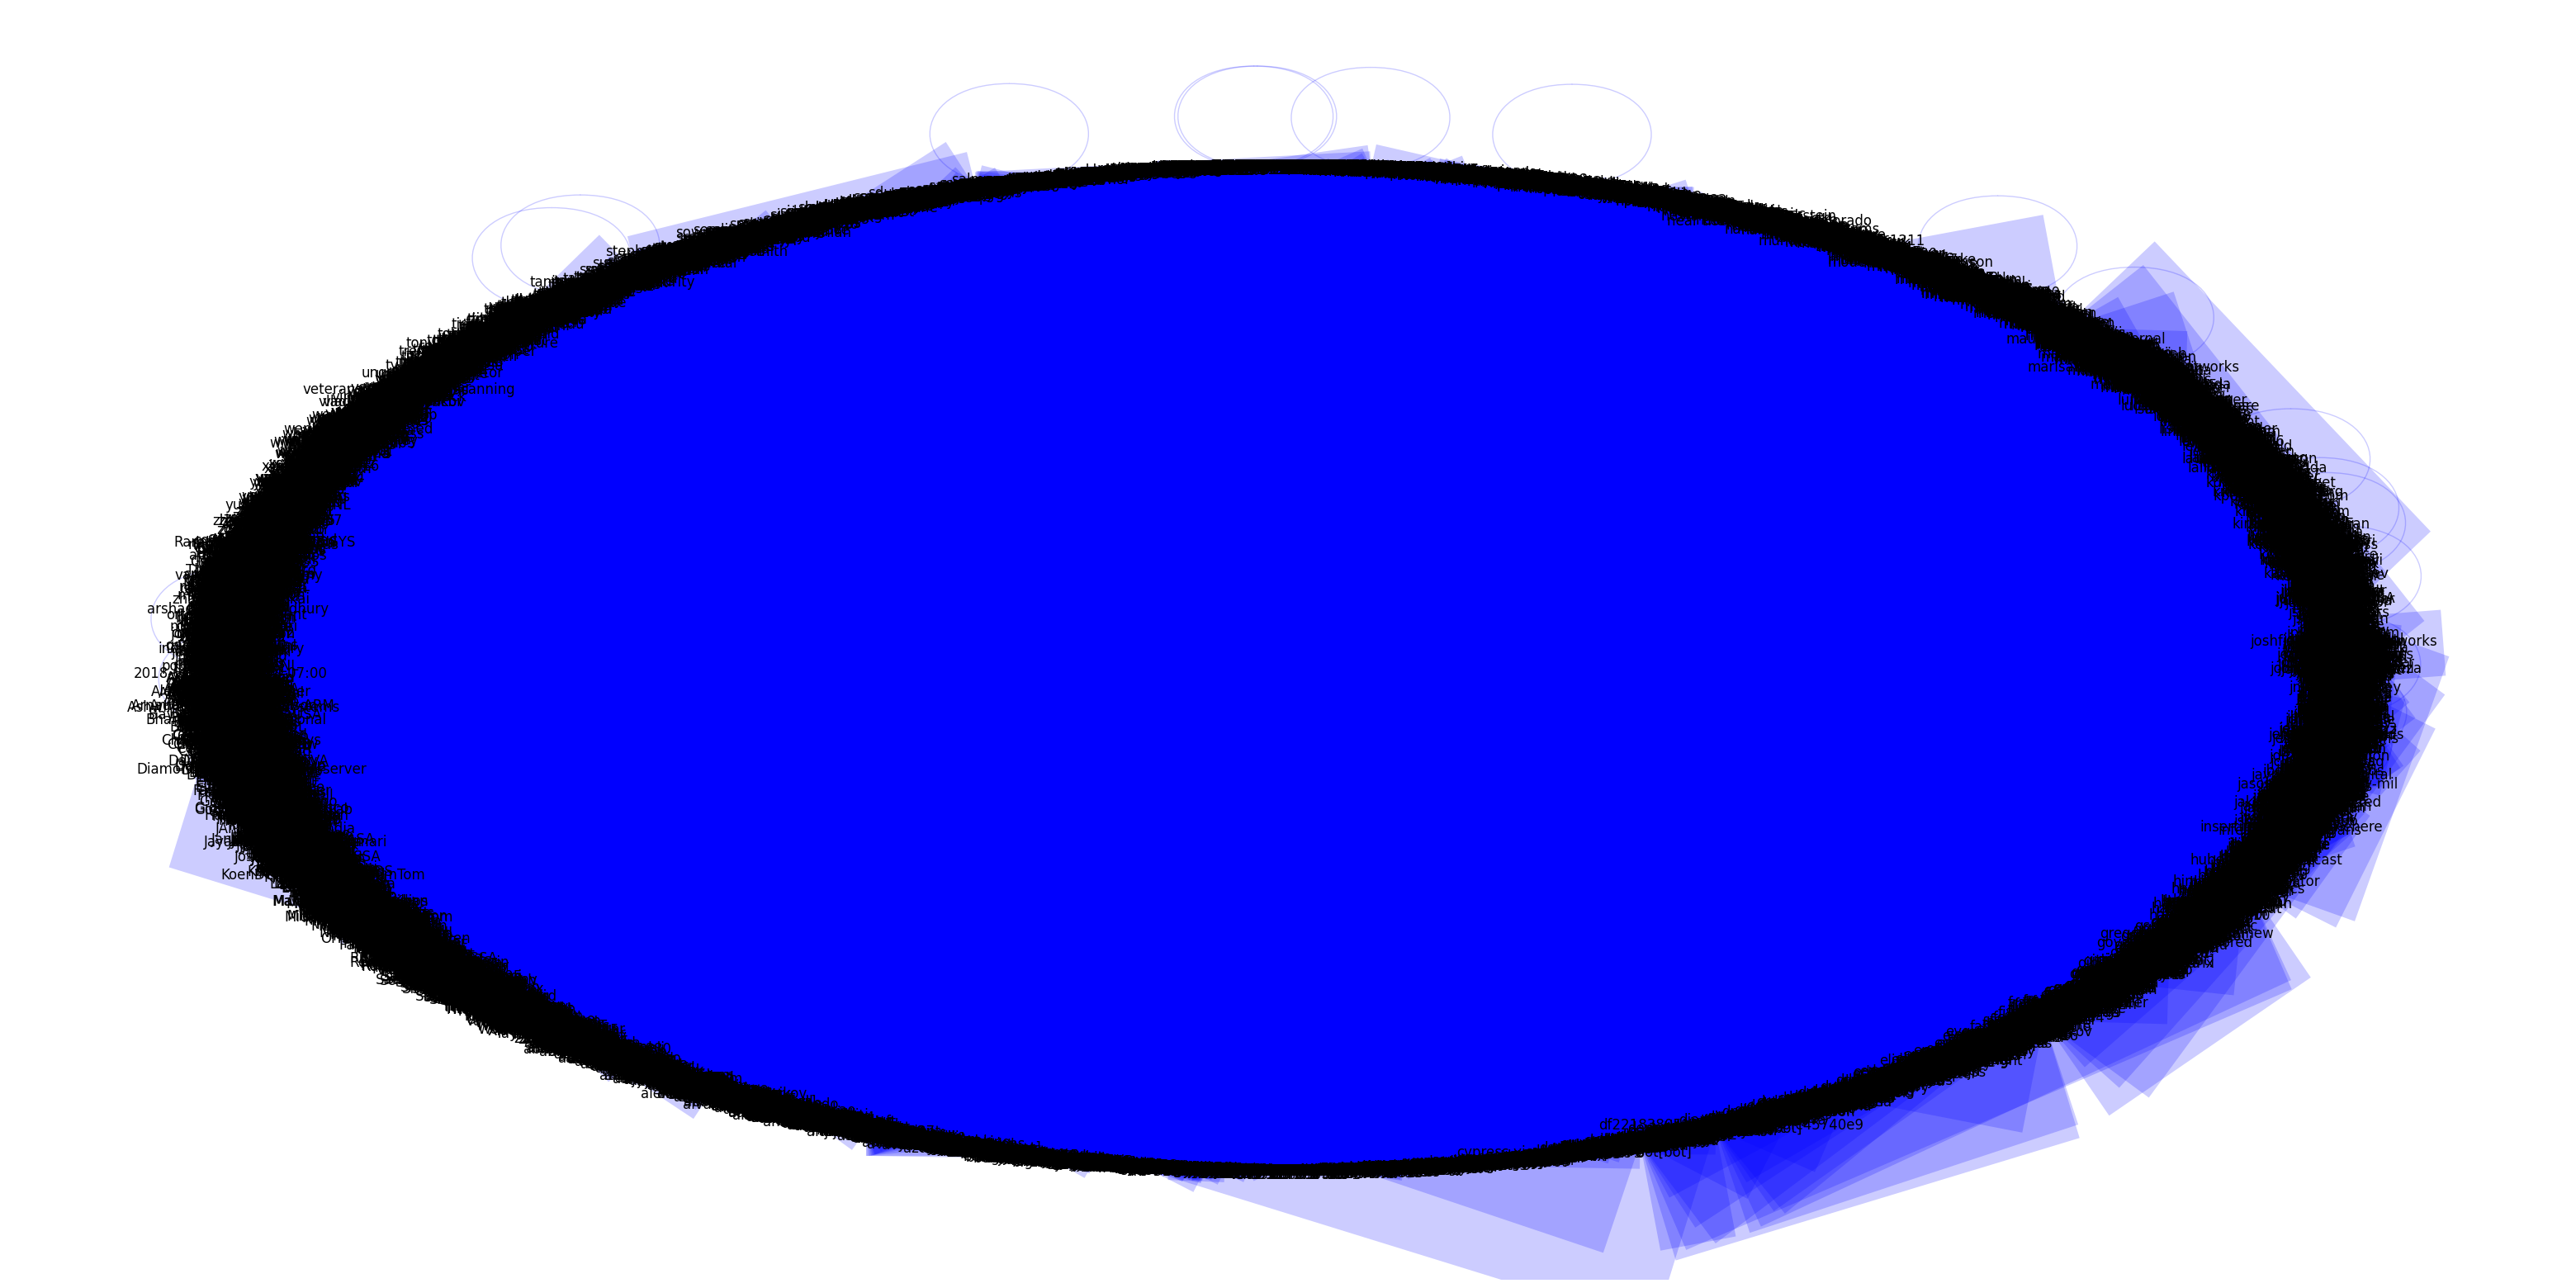

In [22]:
# Reference link: https://stackoverflow.com/questions/62935983/vary-thickness-of-edges-based-on-weight-in-networkx

widths = networkx.get_edge_attributes(G, 'weight')
nodelist = G.nodes()

plt.figure(figsize=(40,20))

pos = networkx.shell_layout(G)
networkx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=1,
                       node_color='lightblue')
networkx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color='blue',
                       alpha=0.2)
networkx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='black')
plt.box(False)
plt.savefig('Network.png', bbox_inches='tight')
plt.show(block=False)

Degree Distribution Plot

In [25]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 9.3 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [23]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

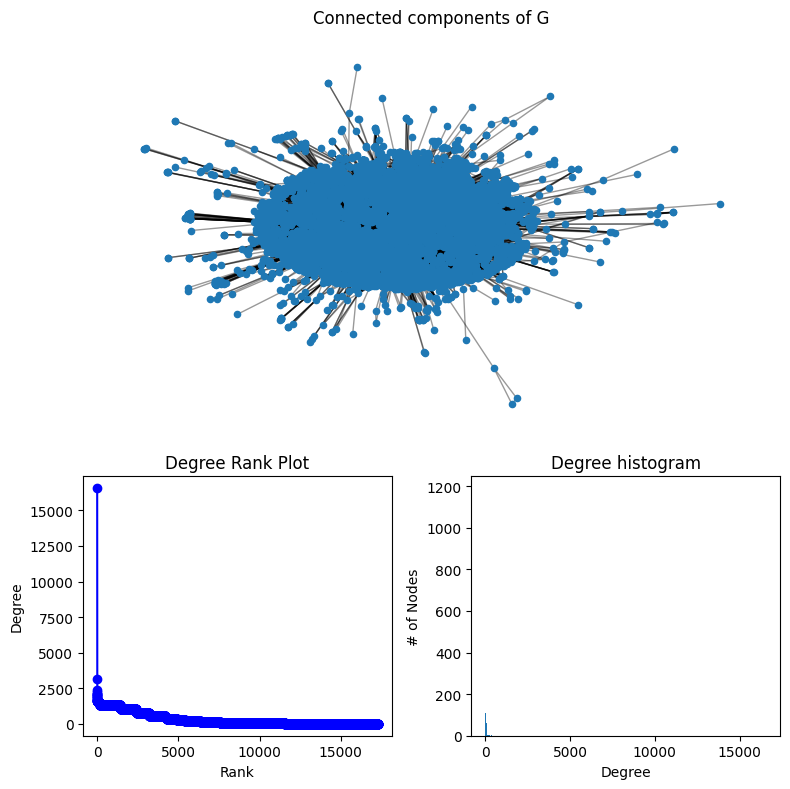

In [26]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [37]:
df_check.replace('',np.nan,regex = True, inplace=True)

In [38]:
df_check

,source,target,weight
0,NaN,NaN,1
1,NaN,0111sandesh,1
2,NaN,0mp,3
3,NaN,0x0L,1
4,NaN,0x3430D,1
...,...,...,...
2592412,zouihao,zxdawn,1
2592413,zpatrick,zsalzbank,1
2592414,zploskey,zywina,1
2592415,zssherman,zxdawn,1


In [41]:
df_check.dropna(subset=['source'], inplace=True)

In [2]:
import networkx
G = networkx.from_pandas_edgelist(df_check, edge_attr=True)

NameError: name 'df_check' is not defined

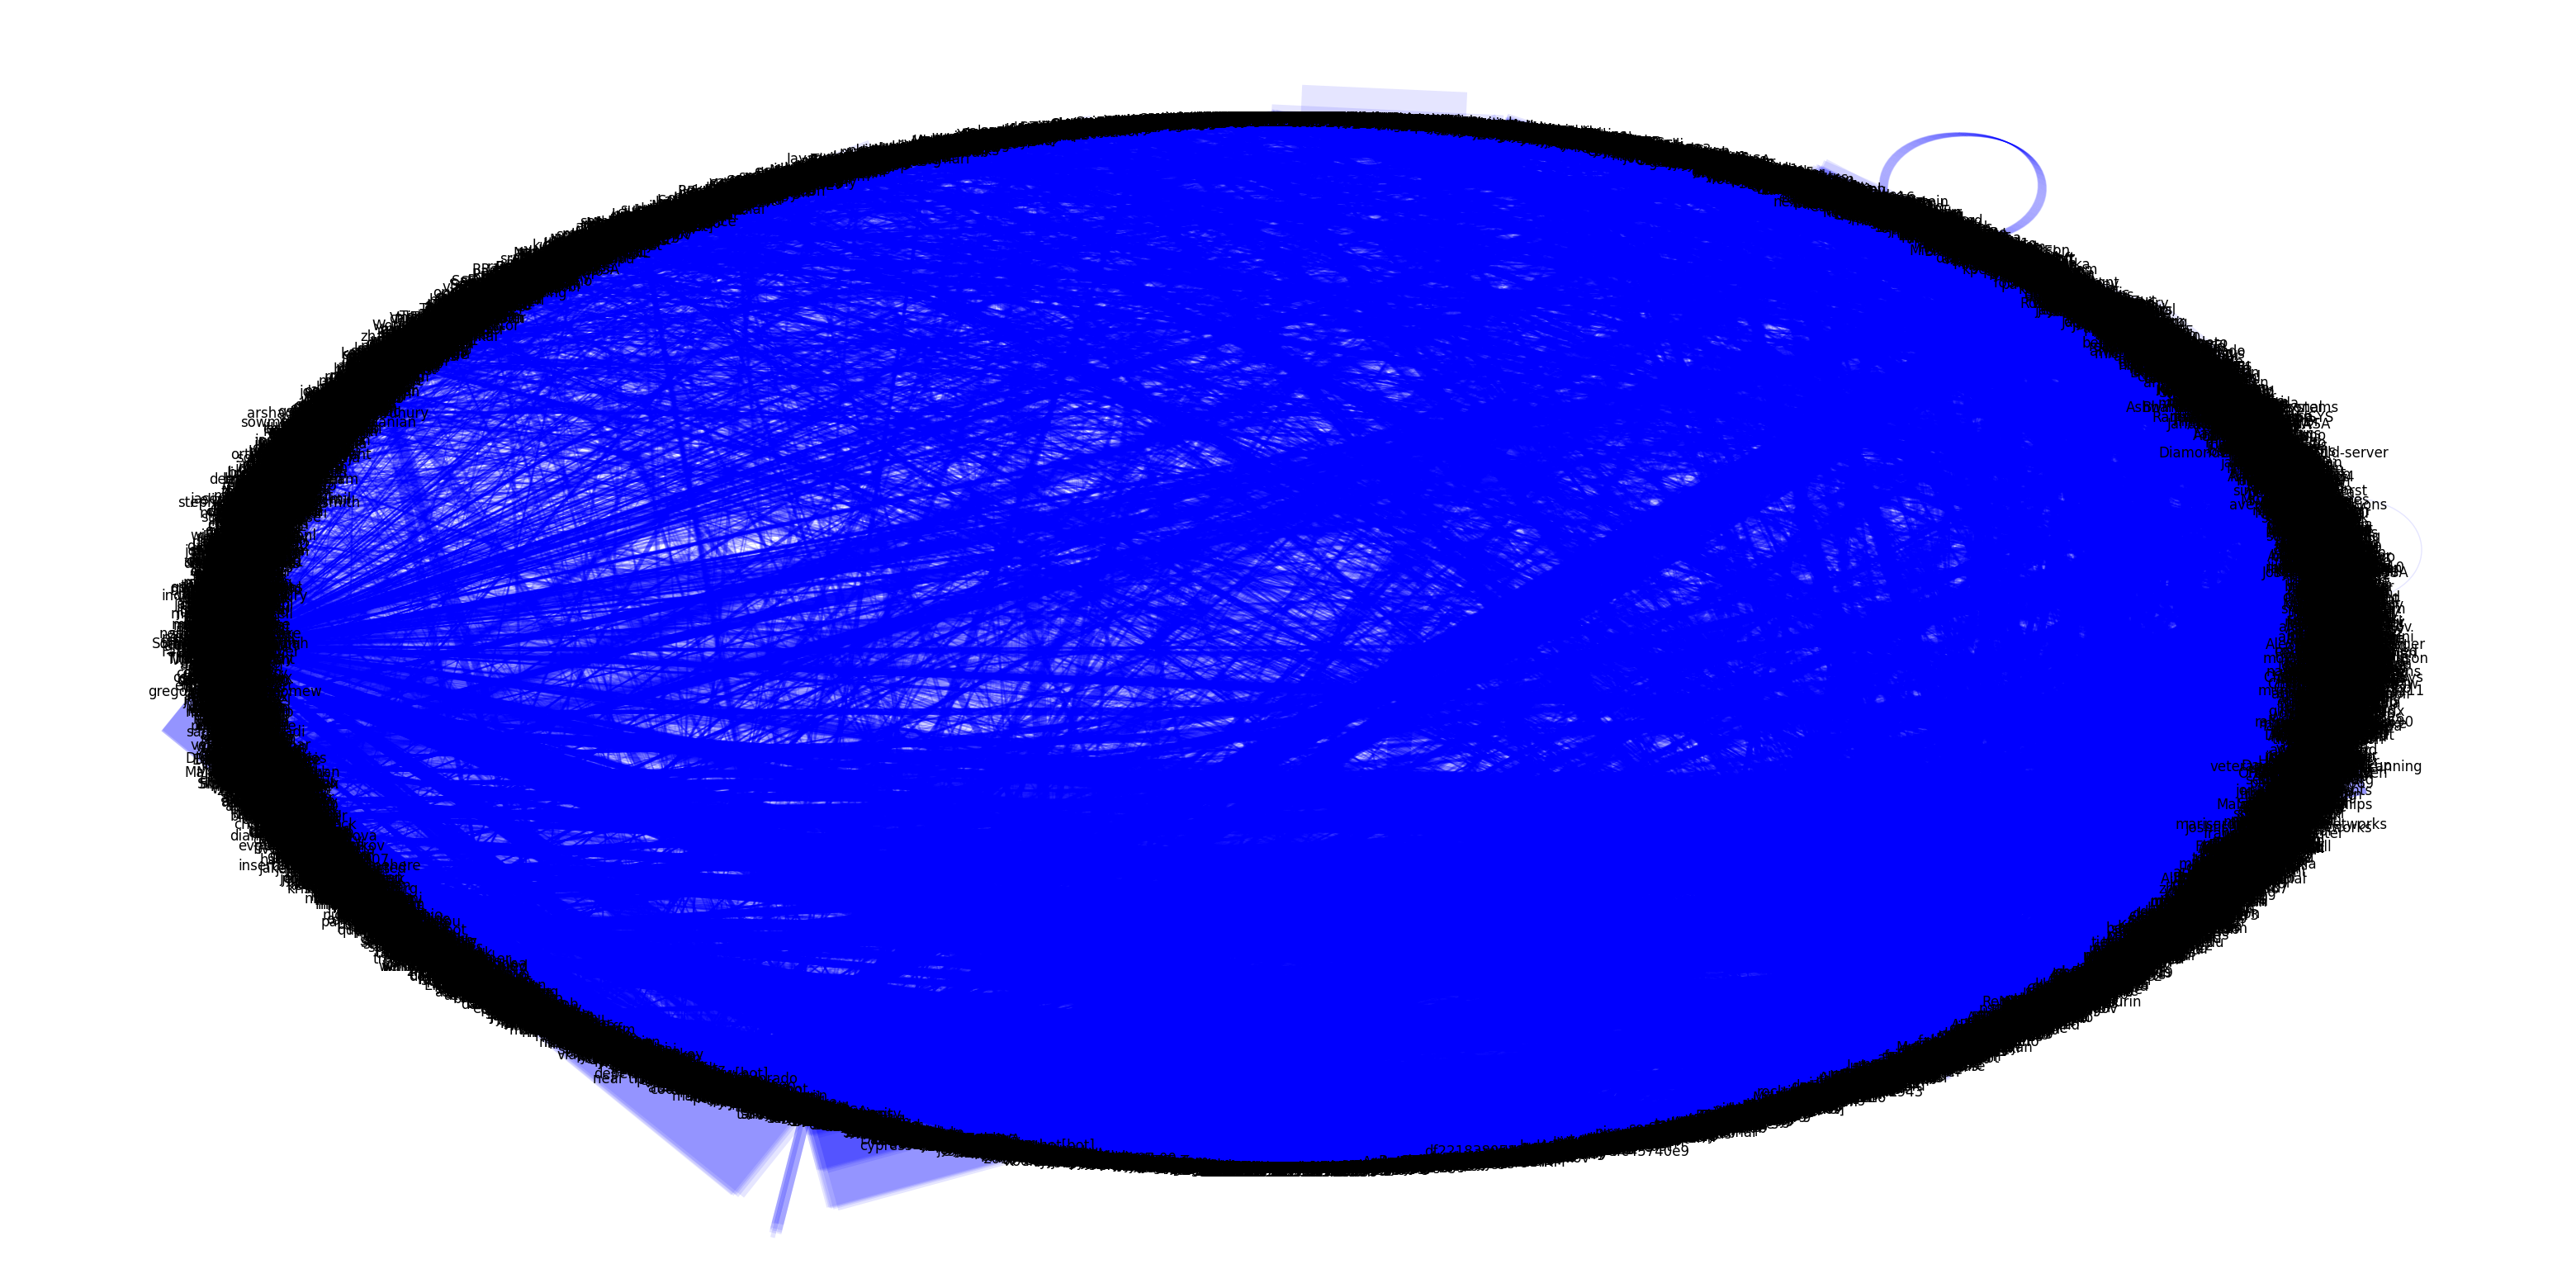

In [46]:
# Reference link: https://stackoverflow.com/questions/62935983/vary-thickness-of-edges-based-on-weight-in-networkx

widths = networkx.get_edge_attributes(G, 'weight')
nodelist = G.nodes()

plt.figure(figsize=(40,20))

pos = networkx.shell_layout(G)
networkx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=1,
                       node_color='lightblue')
networkx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color='blue',
                       alpha=0.1)
networkx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='black')
plt.box(False)
plt.savefig('Network.png', bbox_inches='tight')
plt.show(block=False)

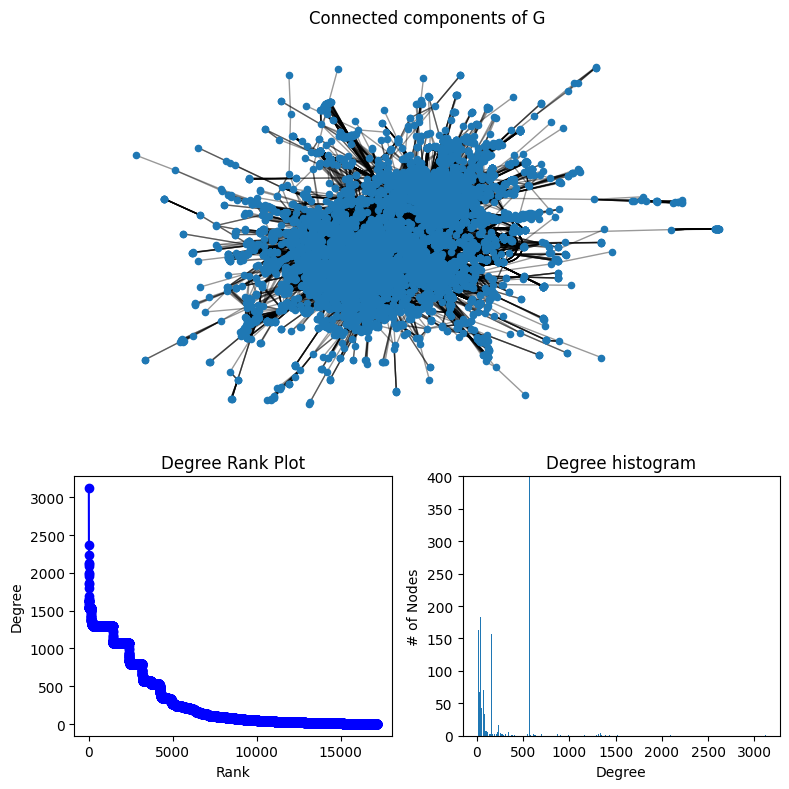

In [48]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of Contributor Network")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_ylim(0, 400)
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

### Network Metrics

In [1]:
## Degree Centrality

degree_centrality(G)



NameError: name 'degree_centrality' is not defined

Most of the nodes have between 0 to 250 connections with very few nodes exceeding connections of 600+. The degree distribution graph shows nodes are spread between a degree of 0 to 4000.

Add density plots
Connected components
summary stats of network
centrality metrics
etc.

Project Network
- Aggregate at Slug


Communities detection algorithm (clustering of network)
    - modularity algorithm
    - corresponding agency
    - 


Network Metrics
 - Diameter
 - 



Influential nodes
- Top 10 Nodes by centrality, degree, etc

- Top 


Aggregate at 
- Countries
- Organizations/Institution
- Agency
- Sectors
- Labs



Influence